<a href="https://colab.research.google.com/github/Amine-OMRI/HR-Analytics/blob/data_preprocessing/HR_Analytics_Modeling_Stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plaug_train = pd.read_csv('/content/HR-Analytics/Preprocessed_data/preprocessed_OHE_city_MissVal_replaced_Gender_company_Type_Size_train.csv')
print("Detailed candidates train data row, cols: ", aug_train.shape)

aug_test = pd.read_csv('/content/HR-Analytics/Preprocessed_data/preprocessed_OHE_city_MissVal_replaced_Gender_company_Type_Size_test.csv')
print("Detailed candidates test data row, cols: ", aug_test.shape)t 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.metrics import f1_score
from tqdm import tqdm

pd.set_option('display.max_rows', 500)

In [5]:
%matplotlib inline
sns.set()

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
plt.rcParams['figure.figsize'] = 15, 5

# Loading the data

In [1]:
!git clone -b data_preprocessing https://github.com/Amine-OMRI/HR-Analytics.git

Cloning into 'HR-Analytics'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (250/250), done.
remote: Total 265 (delta 163), reused 27 (delta 11), pack-reused 0
Receiving objects: 100% (265/265), 4.91 MiB | 4.65 MiB/s, done.
Resolving deltas: 100% (163/163), done.


In [2]:
!ls HR-Analytics/Preprocessed_data

preprocessed_BINE_city_COMBINED_ORDE_experience_aug_test.csv
preprocessed_BINE_city_COMBINED_ORDE_experience_aug_train.csv
preprocessed_BINE_city_ORDE_experience_aug_test.csv
preprocessed_BINE_city_ORDE_experience_aug_train.csv
preprocessed_HACHE_city_COMBINED_ORDE_experience_aug_test.csv
preprocessed_HACHE_city_COMBINED_ORDE_experience_aug_train.csv
preprocessed_HACHE_city_ORDE_experience_aug_test.csv
preprocessed_HACHE_city_ORDE_experience_aug_train.csv
preprocessed_OHE_city_COMBINED_ORDE_experience_aug_test.csv
preprocessed_OHE_city_COMBINED_ORDE_experience_aug_train.csv
preprocessed_OHE_city_MissVal_replaced_Gender_company_Type_Size_test.csv
preprocessed_OHE_city_MissVal_replaced_Gender_company_Type_Size_train.csv
preprocessed_OHE_city_ORDE_experience_aug_test.csv
preprocessed_OHE_city_ORDE_experience_aug_train.csv
preprocessed_OHE_Combined_city_Experience_MISSING_MissVal_replaced_Gender_company_Type_Size_test.csv
preprocessed_OHE_Combined_city__Experience_MISSING_MissVal_replaced_

In [6]:
aug_train = pd.read_csv('/content/HR-Analytics/Preprocessed_data/preprocessed_OHE_city_MissVal_replaced_Gender_company_Type_Size_train.csv')
print("Detailed candidates train data row, cols: ", aug_train.shape)

Detailed candidates train data row, cols:  (19158, 136)


In [7]:
aug_test = pd.read_csv('/content/HR-Analytics/Preprocessed_data/preprocessed_OHE_city_MissVal_replaced_Gender_company_Type_Size_test.csv')
print("Detailed candidates test data row, cols: ", aug_test.shape)

Detailed candidates test data row, cols:  (2129, 135)


In [20]:
aug_train.columns

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'code_city_1',
       ...
       'code_city_90', 'code_city_91', 'code_city_93', 'code_city_94',
       'code_city_97', 'code_city_98', 'code_city_99',
       'city_development_index', 'training_hours', 'target'],
      dtype='object', length=135)

In [9]:
# The dataset is imbalance
aug_train.target.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [10]:
aug_test.drop(['Unnamed: 0'], axis=1, inplace= True)
aug_train.drop(['Unnamed: 0'], axis=1, inplace= True)

# Synthetic Minority Oversampling Technique
---
One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or **SMOTE** for short.

* **SMOTE** works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

* Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

*… SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.*




In [21]:
!pip install imbalanced-learn

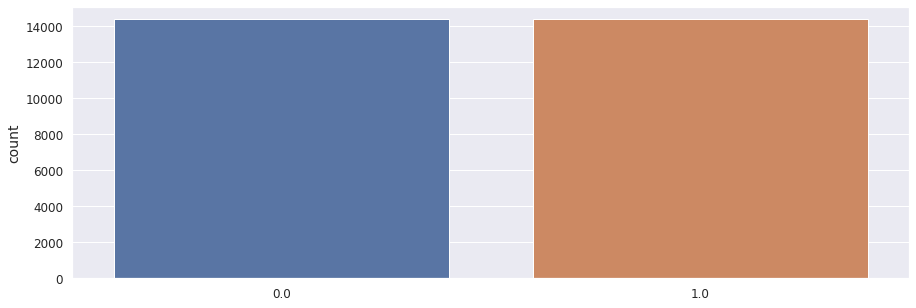

In [22]:
from imblearn.over_sampling import SMOTE
X = aug_train.drop(columns=['target']).values
y = aug_train['target'].values
smote = SMOTE(random_state = 402)
X_smote, Y_smote = smote.fit_resample(X,y)
sns.countplot(Y_smote)

# Train/test Split

In [23]:
# imbalanced data
# X = aug_train.drop(columns=['target']).values
# y = aug_train['target'].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# SMOTE balanced Data
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.1, random_state=42)


# Triying Scaling
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

print("Train set X:",X_train.shape, "y:", y_train.shape)
print("Val set  X:",X_val.shape, "y:",y_val.shape)
print("Test set X:",X_test.shape, "y:", y_test.shape)

Train set X: (19413, 134) y: (19413,)
Val set  X: (6472, 134) y: (6472,)
Test set X: (2877, 134) y: (2877,)


# Modeling

In [46]:
import itertools
from sklearn.datasets import make_classification
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier 

# Used to ignore warnings generated from StackingCVClassifier
import warnings
warnings.simplefilter('ignore')

In [47]:
# Different Models that I will be using:

# Initializing Support Vector classifier
clf1 = SVC(C = 50, degree = 1, gamma = "auto", kernel = "rbf", probability = True)

# Initializing Multi-layer perceptron  classifier
clf2 = MLPClassifier(activation = "relu", alpha = 0.1, hidden_layer_sizes = (10,10,10),
                    learning_rate = "constant", max_iter = 2000, random_state = 1000)

# Initializing Random Forest classifier
clf3 = RandomForestClassifier(n_estimators = 500, criterion = "gini", max_depth = 10,
                              max_features = "auto", min_samples_leaf = 0.005,
                              min_samples_split = 0.005, n_jobs = -1,
                              random_state = 1000)

# Initialing LogisticRegression classifier
clf4  = LogisticRegression(n_jobs=-1, solver='sag', random_state = 1000)

In [48]:
# Initializing the StackingCV classifier
sclf = StackingCVClassifier(classifiers = [clf1, clf2, clf3, clf4],
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = SVC(probability = True))

In [49]:
# Create list to store classifiers
classifiers = {"SVC": clf1,
               "MLP": clf2,
               "RF": clf3,
               "LR": clf4,
               "Stack": sclf} #"NuSVC": classifier3,

In [50]:
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier

In [51]:
# Get results
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test

In [52]:
results

,SVC,MLP,RF,LR,Stack,Target
0,0.898820,0.487330,0.529557,0.498920,0.872400,1.0
1,0.063949,0.357221,0.341839,0.256370,0.116961,0.0
2,0.161388,0.135740,0.450269,0.408121,0.127904,0.0
3,0.759026,0.737906,0.529414,0.505613,0.840223,1.0
4,0.902724,0.852271,0.776900,0.891457,0.846138,1.0
...,...,...,...,...,...,...
2872,0.342810,0.183107,0.348732,0.509224,0.081215,0.0
2873,0.269352,0.187591,0.405300,0.425873,0.114425,0.0
2874,0.982453,0.860617,0.706388,0.860419,0.853061,1.0
2875,0.029337,0.235760,0.247601,0.184894,0.126232,0.0


In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

for key, counter in zip(classifiers, range(5)):
    # Get predictions
    y_pred = results[key]
    predictions = [round(value) for value in y_pred]

    print("---",key,"----------------------------")
    # Calculate Accuracy on test set
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    # Calculate the F1 score on test set
    f1 = f1_score(y_test, predictions)
    print('F1 score: %f' % f1)

    # Calculate the AUC score on test set
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    print('AUC score: %f' % auc(fpr, tpr))

--- SVC ----------------------------
Accuracy: 82.24%
F1 score: 0.825894
AUC score: 0.822406
--- MLP ----------------------------
Accuracy: 80.85%
F1 score: 0.810848
AUC score: 0.808495
--- RF ----------------------------
Accuracy: 82.34%
F1 score: 0.827093
AUC score: 0.823450
--- LR ----------------------------
Accuracy: 75.46%
F1 score: 0.749823
AUC score: 0.754586
--- Stack ----------------------------
Accuracy: 85.71%
F1 score: 0.858811
AUC score: 0.857156


              precision    recall  f1-score   support

         0.0       0.87      0.84      0.86      1440
         1.0       0.85      0.87      0.86      1437

    accuracy                           0.86      2877
   macro avg       0.86      0.86      0.86      2877
weighted avg       0.86      0.86      0.86      2877



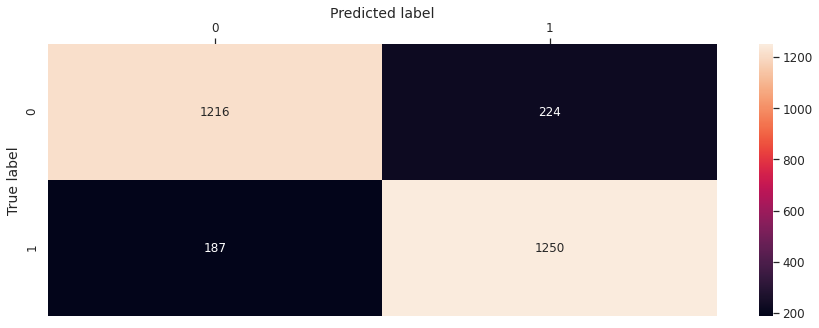

In [54]:
# Check the stacking Confusion Matrix
y_pred = results["Stack"]
predictions = [round(value) for value in y_pred]
## Test set confusion_matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d")
# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
print(classification_report(y_test, predictions))